In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from fbprophet import *
import itertools
from matplotlib import pyplot as plt 
%matplotlib inline
sns.set_style("whitegrid")
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
import string

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np # linear algebra
import pandas as pd # pandas for dataframe based data processing and CSV file I/O


import statistics as stats
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# df=pd.read_csv('data.csv',encoding = "ISO-8859-1")
df=pd.read_csv('drive/My Drive/DSc/data.csv',encoding = "ISO-8859-1")

df.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
data=df
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
# data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
state       435735 non-null object
location    435735 non-null object
type        430345 non-null object
so2         401092 non-null float64
no2         419505 non-null float64
rspm        395516 non-null float64
spm         198355 non-null float64
pm2_5       9314 non-null float64
date        435735 non-null datetime64[ns]
year        435735 non-null float64
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 36.6+ MB


In [ ]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(data.iloc[:, 3:8].values)
# data.iloc[:,3:8] = imputer.transform(data.iloc[:, 3:8].values)
# data = data.apply (pd.to_numeric, errors='coerce')
data=data.drop(columns=['pm2_5','rspm','spm'])
data = data.dropna()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394176 entries, 0 to 435738
Data columns (total 7 columns):
state       394176 non-null object
location    394176 non-null object
type        394176 non-null object
so2         394176 non-null float64
no2         394176 non-null float64
date        394176 non-null datetime64[ns]
year        394176 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 24.1+ MB


,state,location,type,so2,no2,date,year
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,1990-02-01,1990.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,1990-02-01,1990.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,1990-02-01,1990.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,1990-03-01,1990.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,1990-03-01,1990.0


In [ ]:
data['type'].describe()
#With 10 Unique labels, we will fill the null values by the most common type, which is 'Residential, Rural and Other Areas'.
common_value='Residential,Rural and other Areas'
data['type']=data['type'].fillna(common_value)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394176 entries, 0 to 435738
Data columns (total 7 columns):
state       394176 non-null object
location    394176 non-null object
type        394176 non-null object
so2         394176 non-null float64
no2         394176 non-null float64
date        394176 non-null datetime64[ns]
year        394176 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.1+ MB


In [ ]:
pd.isnull(data).sum()

state       0
location    0
type        0
so2         0
no2         0
date        0
year        0
dtype: int64

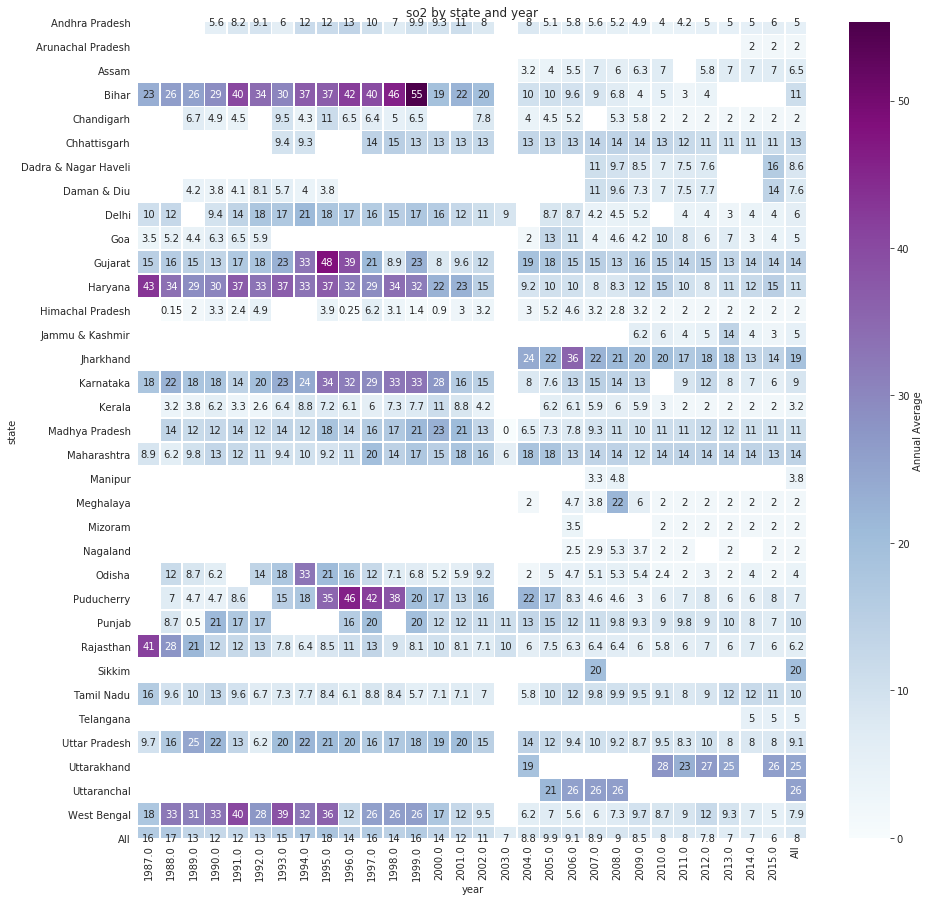

In [ ]:
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(data.pivot_table('so2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

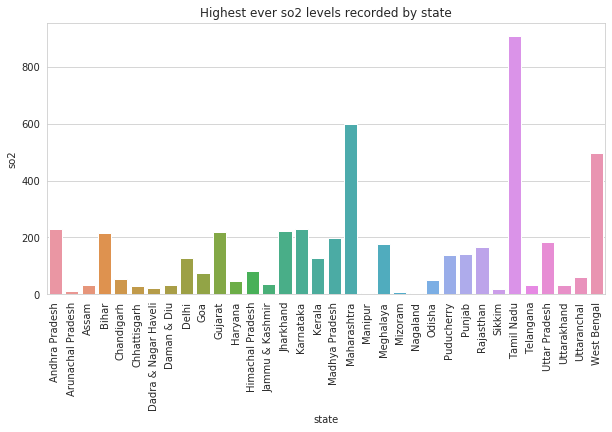

In [ ]:
def high_lvl(indicator="so2"):
    plt.figure(figsize=(10,5))
    ind = data[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).max()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90)
high_lvl()

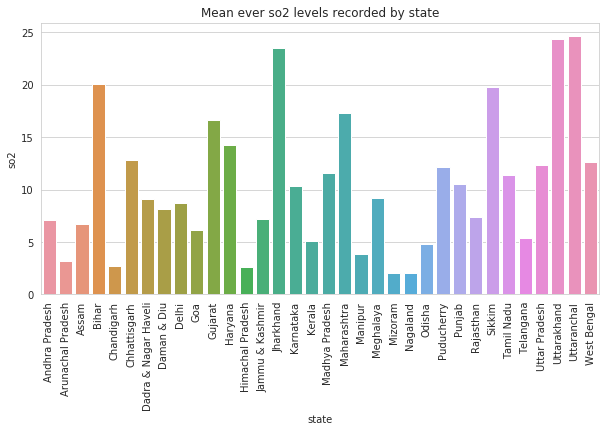

In [ ]:
def mean_lvl(indicator="so2"):
    plt.figure(figsize=(10,5))
    ind = data[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).mean()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Mean ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90)
mean_lvl()

In [ ]:
data.keys()

Index(['state', 'location', 'type', 'so2', 'no2', 'date', 'year'], dtype='object')

In [ ]:
def pro(d1,x,m):
  d1['date']=pd.to_datetime(d1['date'])
  d1=d1.rename(columns={"date": "ds", x: "y"})
  m.fit(d1)
  future = m.make_future_dataframe(periods=365*4)
  future.tail()
  forecast = m.predict(future)
  forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
  fig1 = m.plot(forecast)
  fig2 = m.plot_components(forecast)

In [ ]:

m=Prophet()
dso2=data.drop(['state', 'location', 'type', 'no2', 'rspm', 'spm', 'pm2_5',
        'year'],axis=1)
pro(dso2,"so2",m)

KeyError: ignored

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


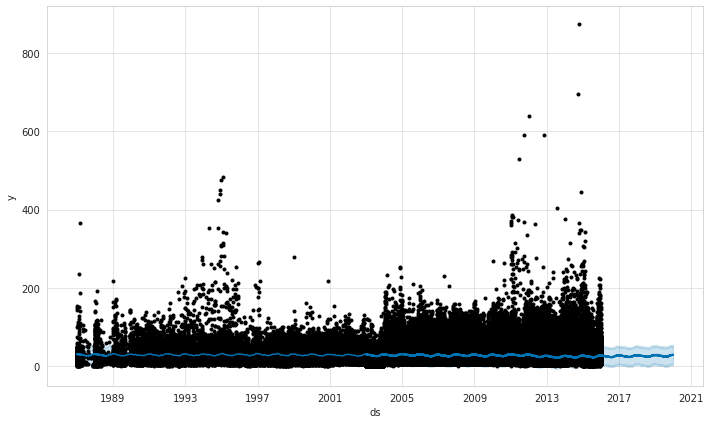

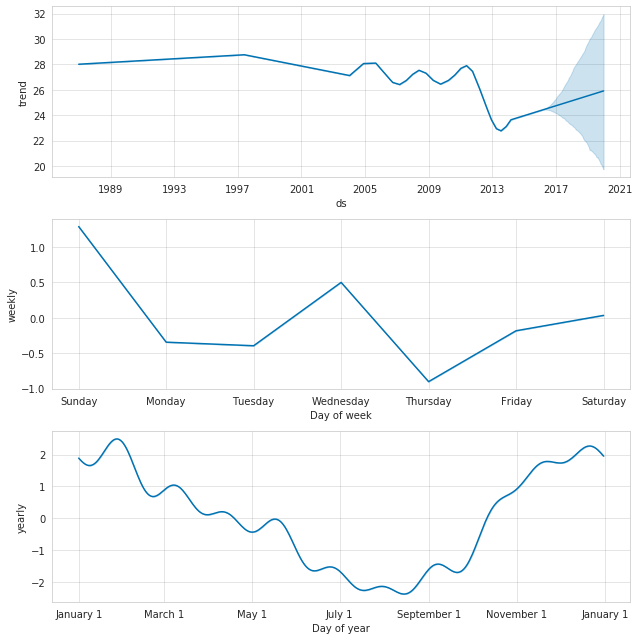

In [ ]:
m=Prophet()
dno2=data.drop(['state', 'location', 'type', 'so2', 'rspm', 'spm', 'pm2_5',
        'year'],axis=1)
pro(dno2,"no2",m)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


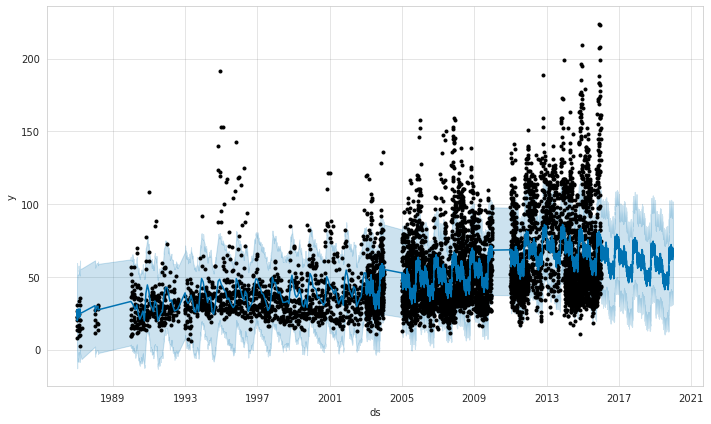

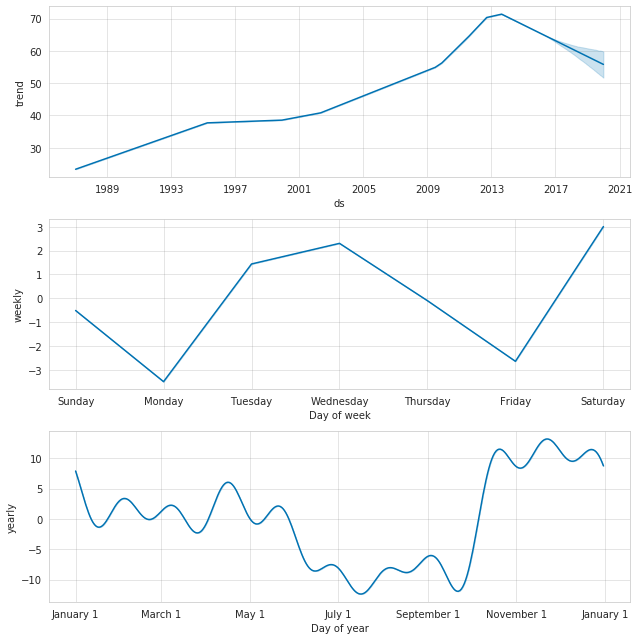

In [ ]:
m=Prophet()

dno2delhi=data[data['location']=='Delhi']
# print(dno2delhi)
# dno2delhi=dno2delhi.drop(['state', 'location','type', 'so2', 'rspm', 'spm', 'pm2_5','year'],axis=1)
dno2delhi=dno2delhi.drop(['state', 'location','type', 'so2', 'year'],axis=1)

pro(dno2delhi,"no2",m)


In [ ]:
# future = m.make_future_dataframe(periods=365)
# forecast = m.predict(future)
# m.plot_components(forecast)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


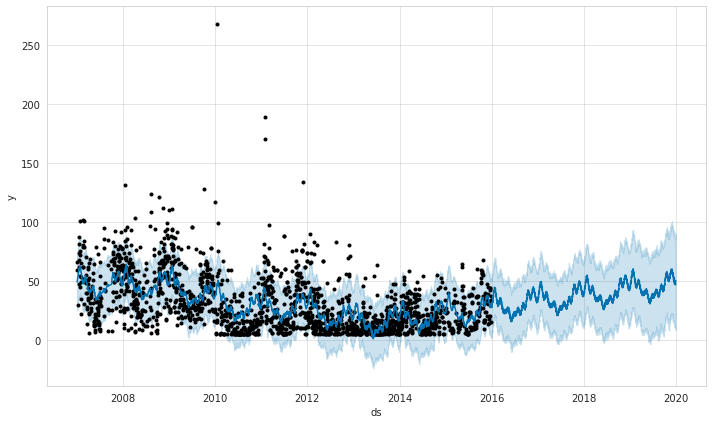

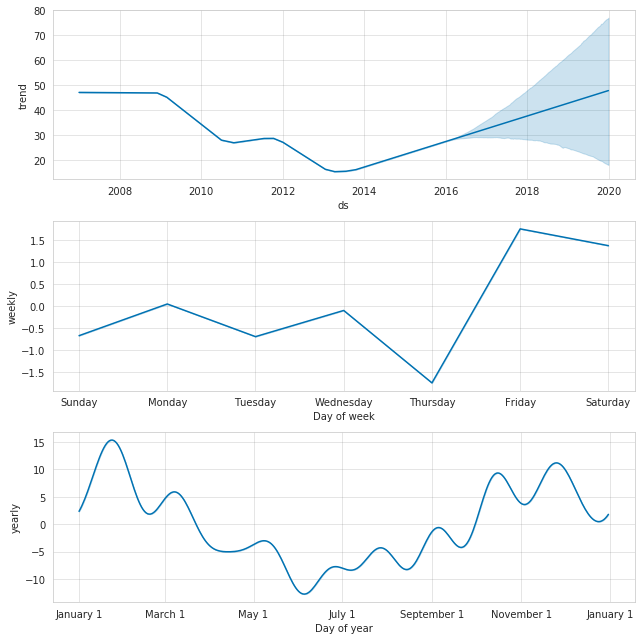

In [ ]:
m=Prophet()

dno2mum=data[data['location']=='Mumbai']
# print(dno2delhi)
# dno2mum=dno2mum.drop(['state', 'location','type', 'so2', 'rspm', 'spm', 'pm2_5','year'],axis=1)
dno2mum=dno2mum.drop(['state', 'location','type', 'so2', 'year'],axis=1)
pro(dno2mum,"no2",m)

In [ ]:
pip install pyflux

     |████████████████████████████████| 1.3MB 2.8MB/s 
     |████████████████████████████████| 962kB 37.1MB/s 
ERROR: Operation cancelled by user


Text(0.5, 1.0, 'NO2 Analysis')

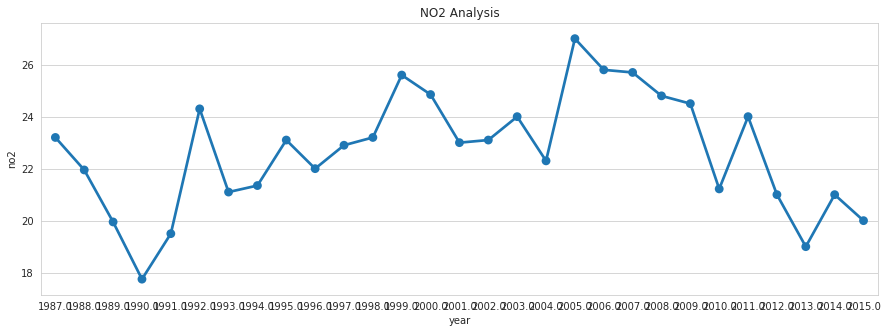

In [ ]:
df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='no2', data=df).set_title("NO2 Analysis")



Text(0.5, 1.0, 'SO2 Analysis')

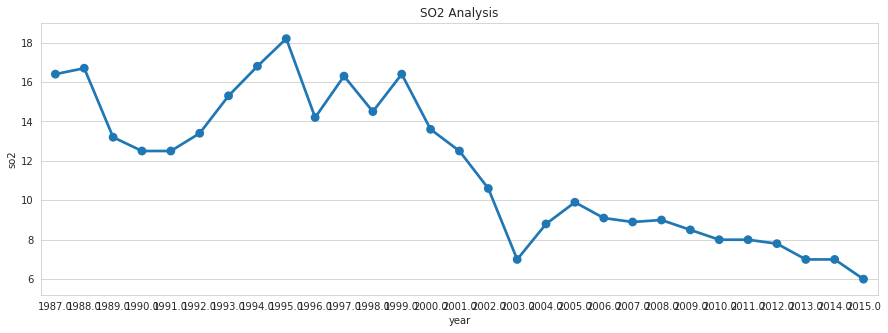

In [ ]:
dk = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='so2', data=dk).set_title("SO2 Analysis")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7809 entries, 65861 to 74411
Data columns (total 2 columns):
no2     7809 non-null float64
date    7809 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 183.0 KB
None


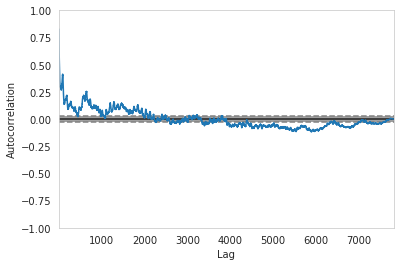

In [ ]:
print(dno2delhi.info() )
autocorrelation_plot(dno2delhi['no2'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


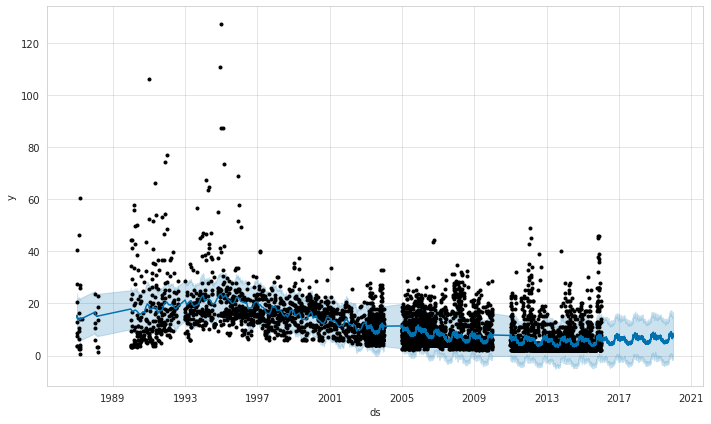

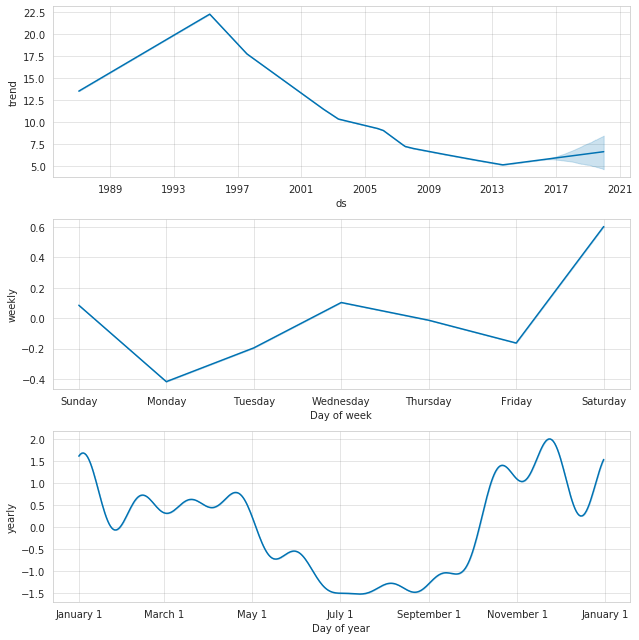

In [ ]:
m=Prophet()

dso2delhi=data[data['location']=='Delhi']
# print(dno2delhi)
# dso2delhi=dso2delhi.drop(['state', 'location','type', 'no2', 'rspm', 'spm', 'pm2_5','year'],axis=1)
dso2delhi=dso2delhi.drop(['state', 'location','type', 'no2','year'],axis=1)
pro(dso2delhi,"so2",m)

predicted=14.171038, expected=13.500000
predicted=12.612389, expected=14.100000
predicted=14.314362, expected=13.800000
predicted=14.314084, expected=13.800000
predicted=15.054255, expected=15.400000
predicted=15.861792, expected=14.700000
predicted=15.418237, expected=12.200000
predicted=12.964617, expected=11.250000
predicted=11.642930, expected=11.400000
predicted=12.559777, expected=11.800000
predicted=12.826533, expected=12.200000
predicted=12.356793, expected=11.300000
Test RMSE: 1.29435


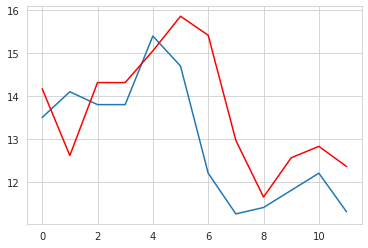

In [ ]:
X = dk['so2'].values
size = int(len(X) * 0.60)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    obs = test[t]
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.5f' % error)
# plot
# plt.plot(train)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=25.446232, expected=23.000000
predicted=23.692650, expected=23.900000
predicted=23.918091, expected=23.800000
predicted=24.071619, expected=25.809659
predicted=25.593103, expected=23.100000
predicted=24.399243, expected=22.150000
predicted=22.513069, expected=25.809659
predicted=24.913981, expected=20.300000
predicted=23.574166, expected=18.800000
predicted=19.177500, expected=21.300000
predicted=20.520193, expected=25.809659
predicted=25.173844, expected=25.809659
Test RMSE: 3.00240


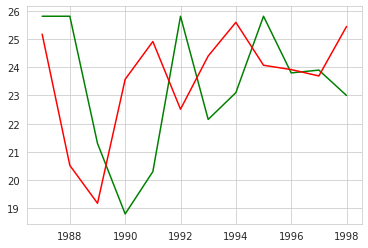

                          Results: ARIMA
Model:              ARIMA            BIC:                 125.2547
Dependent Variable: D.y              Log-Likelihood:      -57.684 
Date:               2019-11-30 12:30 Scale:               1.0000  
No. Observations:   27               Method:              css-mle 
Df Model:           2                Sample:              1       
Df Residuals:       25                                    8       
Converged:          1.0000           S.D. of innovations: 2.048   
No. Iterations:     5.0000           HQIC:                122.523 
AIC:                121.3672                                      
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        0.1848     0.3344    0.5527   0.5854   -0.4706   0.8402
ar.L1.D.y   -0.1897     0.2031   -0.9342   0.3591   -0.5878   0.2083
-----------

In [ ]:
# print(df.info())
X = df['no2'].values
dat=df['year'].values
size = int(len(X) * 0.60)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0,maxiter=1000)
    obs = test[t]
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.5f' % error)
# plot
# plt.plot(dat[0:size],train)
plt.plot(dat[size:len(X)],test,color='green')
plt.plot(dat[size:len(X)],predictions, color='red')
plt.show()
print(model_fit.summary2())

                          Results: ARIMA
Model:              ARIMA            BIC:                 133.1696
Dependent Variable: D.y              Log-Likelihood:      -56.588 
Date:               2019-11-30 12:30 Scale:               1.0000  
No. Observations:   28               Method:              css-mle 
Df Model:           5                Sample:              1       
Df Residuals:       23                                    9       
Converged:          1.0000           S.D. of innovations: 1.760   
No. Iterations:     19.0000          HQIC:                127.620 
AIC:                125.1763                                      
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.0953    0.0943   1.0104  0.3228  -0.0895   0.2801
ar.L1.D.y       0.6060    0.1966   3.0823  0.0053   0.2207   0.9913
ar.L2.D.y      -

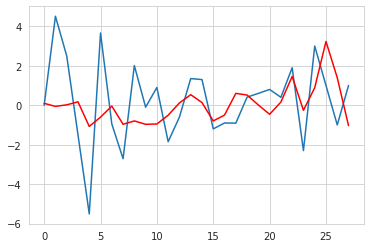

In [ ]:
X_diff = X - df['no2'].shift()
model = ARIMA(X, order=(3, 1, 1))
results_MA = model.fit(disp=-1)  
plt.plot(X_diff)
plt.plot(results_MA.fittedvalues, color='red')
print(results_MA.summary2())

In [ ]:
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))

print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [ ]:
lis=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(X_diff,order=param,seasonal_order=param_seasonal,enforce_stationarity=False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            lis.append( results.aic)
        except:
            continue
# lis.sort()
# print(lis)

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:121.8067918748215
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:75.55447953907549
SARIMAX(0, 0, 0)x(0, 2, 0, 12)12 - AIC:21.45806844967709
SARIMAX(0, 0, 0)x(0, 3, 0, 12)12 - AIC:2.0
SARIMAX(0, 0, 0)x(0, 4, 0, 12)12 - AIC:2.0
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:81.53713856271541
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:25.518465883117088
SARIMAX(0, 0, 0)x(2, 0, 0, 12)12 - AIC:25.1680256319724
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:118.46259562581425
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:70.50569911993784
SARIMAX(0, 0, 1)x(0, 2, 0, 12)12 - AIC:nan
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:81.01005420269392
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:26.708102365059066
SARIMAX(0, 0, 1)x(2, 0, 0, 12)12 - AIC:25.775048803685873
SARIMAX(0, 0, 2)x(0, 0, 0, 12)12 - AIC:112.35570916998097
SARIMAX(0, 0, 2)x(0, 1, 0, 12)12 - AIC:68.3760292461317
SARIMAX(0, 0, 2)x(1, 0, 0, 12)12 - AIC:79.27271441351324
SARIMAX(0, 0, 2)x(1, 1, 0, 12)12 - AIC:29.765404911467545
SARIMAX(0, 0

In [ ]:
np.sort(lis)[0:40]

array([-15.48376471, -15.37355839, -12.23043275, -12.1170055 ,
       -10.86112272, -10.39232858, -10.00396644,  -8.52690879,
        -8.16887155,  -7.59484308,  -7.4043225 ,  -6.83180051,
        -6.41306793,  -4.99432598,  -4.57834507,  -4.56662942,
        -4.52754187,  -4.22172772,  -3.54809111,  -3.47743702,
        -3.28170366,  -3.11754081,  -2.90542911,  -2.73751357,
        -2.69938198,  -2.065614  ,  -1.93203002,  -1.84388996,
        -1.58576846,  -1.26406223,  -0.93229003,   0.29209692,
         0.29705675,   0.35250077,   0.83196342,   1.78204097,
         1.79222112,   2.        ,   2.        ,   2.        ])

In [ ]:
# ARIMA(2, 0, 1)x(2, 0, 0, 12)12
mod = sm.tsa.statespace.SARIMAX(X_diff,
                                order=(2, 0, 1),
                                seasonal_order=(2, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          6.8680      0.331     20.773      0.000       6.220       7.516
ar.L2          4.2970      0.022    195.249      0.000       4.254       4.340
ma.L1          7.7650      0.031    249.608      0.000       7.704       7.826
ar.S.L12       2.7063      0.403      6.723      0.000       1.917       3.495
ar.S.L24    2.887e-05      1.295   2.23e-05      1.000      -2.539       2.539
sigma2         0.0008      0.018      0.043      0.966      -0.035       0.037


ValueError: ignored

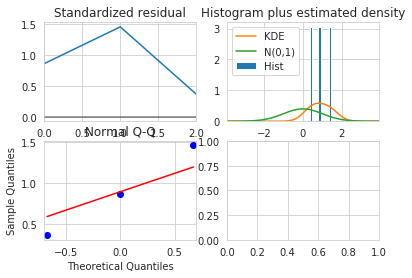

In [ ]:
results.plot_diagnostics()
plt.show()

In [ ]:
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))
    
    ind = data[[indicator, 'state']].groupby('state', as_index=False).mean().sort_values(by=indicator,ascending=False)
    
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='R')
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator))
    top10.set_ylabel("so2 (µg/m3)")
    top10.set_xlabel("State")
    
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='g')
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator))
    bottom10.set_ylabel("so2 (µg/m3)")
    bottom10.set_xlabel("State")


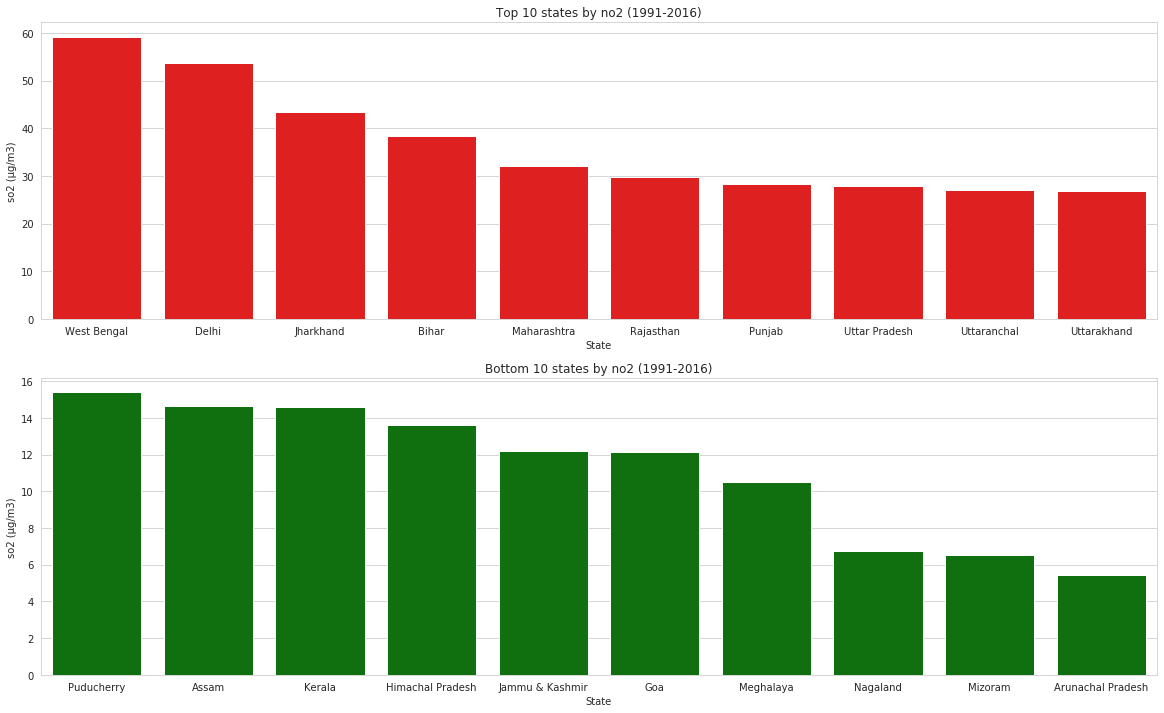

In [ ]:
top_and_bottom_10_states("no2")

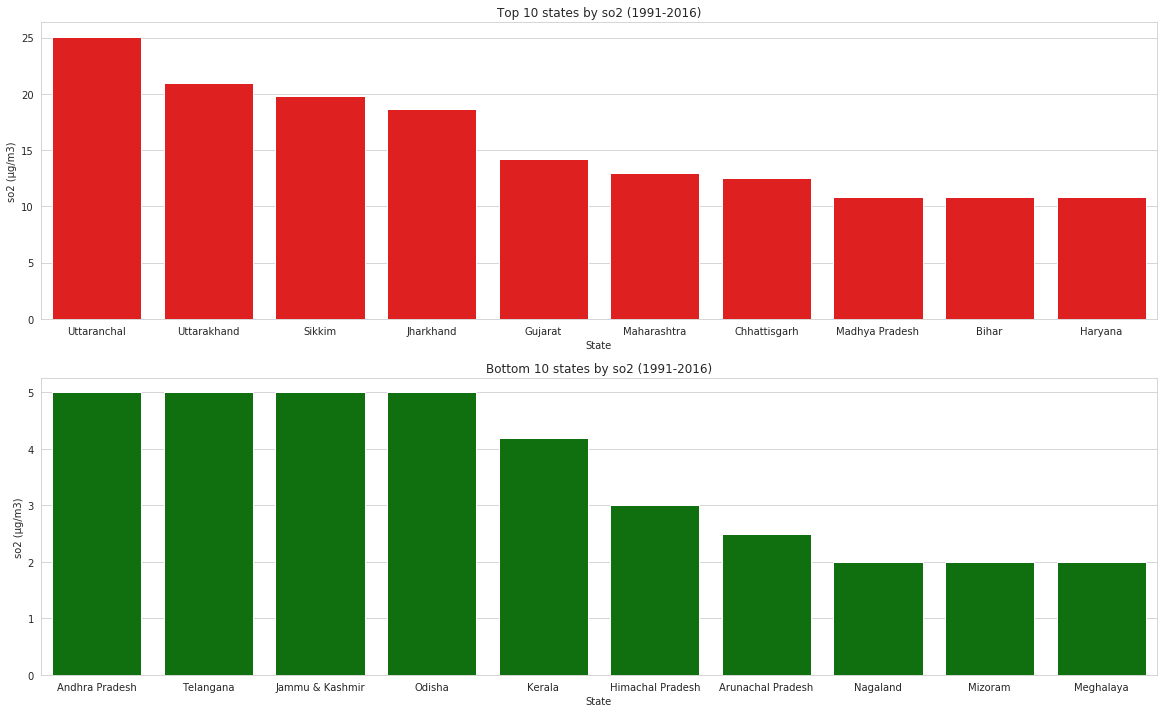

In [ ]:
top_and_bottom_10_states("so2")

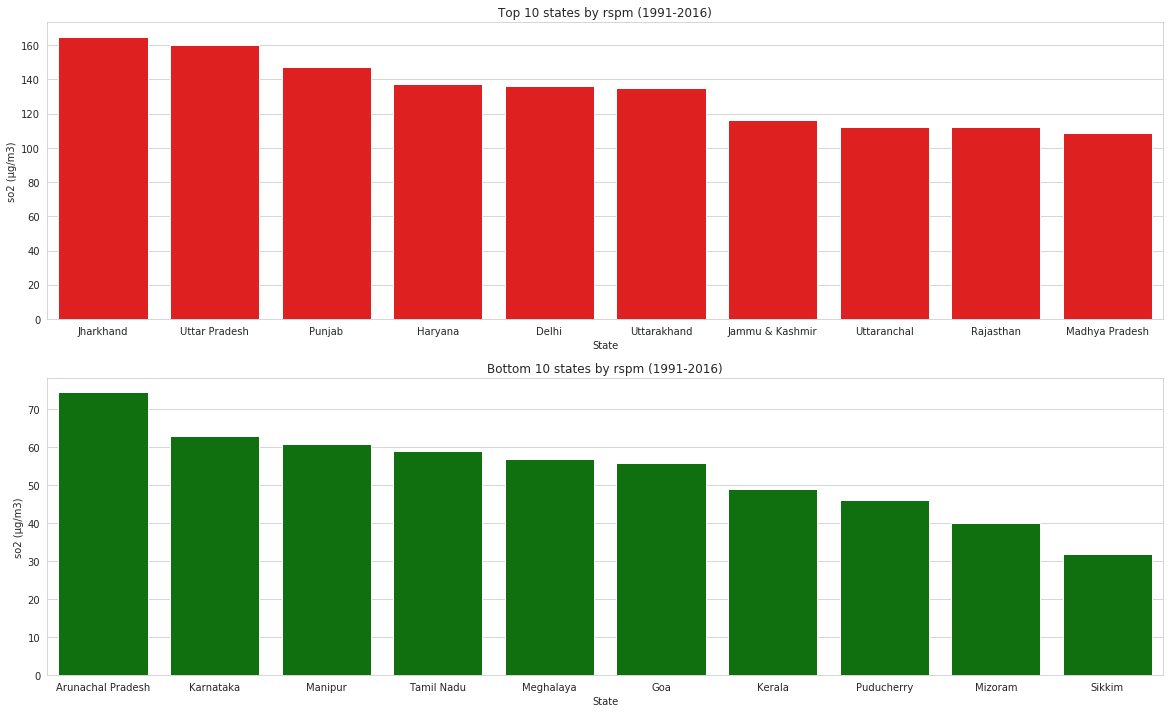

In [ ]:
itop_and_bottom_10_states("rspm")

End

---


